In [188]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker
import os 
import sys
import scipy

In [189]:
df = pd.read_csv('loan_data_2007_2014.csv',low_memory=False); print(df)

        Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 months     15.27        59.83   

In [193]:
## MISSING VALUES 
def max_missing(data,most):
    cols = data.columns
    miss = []
    for (i,col) in enumerate(cols):
        if data[col].isnull().sum() > most:
            print("%s has %d missing values" %(col,data[col].isnull().sum()))
            miss.append(col)

    for (i,col) in enumerate(miss):   # REMOVING
        del data[col]
max_missing(df,200000) # TO START WITH GET RID OF THOSE WITH > 200,000 MISSING VALUES
#print(df['EM_L'])

In [164]:
## TIDY UP
del df['Unnamed: 0']; del df['member_id'] 


In [194]:
## EMPLOYMENT LENGTH
print(df['emp_length'].unique())
df['EM_L'] = df['emp_length'].str.replace('\+ years', '', regex=True)
df['EM_L'] = df['EM_L'].str.replace('< 1 year', str(0))
df['EM_L'] = df['EM_L'].str.replace('n/a',  str(0))
df['EM_L'] = df['EM_L'].str.replace(' years', '')
df['EM_L'] = df['EM_L'].str.replace(' year', '')
del df['emp_length']
df['EM_L'] = df['EM_L'].astype(float)

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [195]:
## TERM OF LOAN
print(df['term'].unique())
df['term'] = df['term'].str.replace('months', '');
df['term'] = pd.to_numeric(df['term']);

print(df['EM_L'].unique()); print(df['term'].unique())

[' 36 months' ' 60 months']
[10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]
[36 60]


0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object
0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: ECL, Length: 466285, dtype: datetime64[ns]
count                  466256
unique                    664
top       2000-10-01 00:00:00
freq                     3674
first     1969-01-01 00:00:00
last      2068-12-01 00:00:00
Name: ECL, dtype: object
2023-05-05
count                  465087
unique                    515
top       2000-10-01 00:00:00
freq                     3674
first     1969-01-01 00:00:00
last      2011-11-01 00:00:00
Name: ECL, dtype: object


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[para]); print(df[para].describe())
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp = df[df[para] < today]; print(temp[para].describe())


count    466256.000000
mean        166.492177
std          93.976747
min        -685.024333
25%         109.998152
50%         152.052404
75%         212.045422
max         513.981807
Name: MNTHS, dtype: float64
count    466256.000000
mean        169.395094
std          86.461715
min           0.000000
25%         111.016653
50%         152.972340
75%         212.045422
max         513.981807
Name: Other_MNTHS, dtype: float64


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[para] = pd.to_datetime(df[['year','month','day']])
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

count    466256.000000
mean        169.500887
std          86.930703
min           0.000000
25%         111.016653
50%         152.972340
75%         212.045422
max         814.012608
Name: ECL_m, dtype: float64


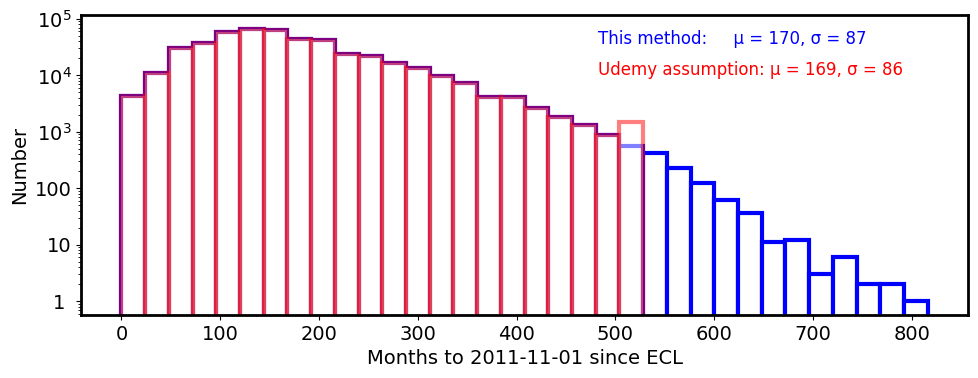

count                  466256
unique                    664
top       2000-10-01 00:00:00
freq                     3674
first     1944-01-01 00:00:00
last      2011-11-01 00:00:00
Name: ECL, dtype: object


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:78: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[para].describe())


In [196]:
## EARLIEST CREDIT LINE
#print(df.columns)
from datetime import date
from datetime import datetime

def date_fix(orig,para,newday,newmonth,newest):  # do as function so can be re-used
    global df

    print(df[orig])
    df[para] = pd.to_datetime(df[orig], format = '%b-%y')
    print(df[para]); print(df[para].describe())

    today = np.datetime64(datetime.today().date()); print(today)
    temp = df[df[para] < today]; print(temp[para].describe())
  
    latest = pd.to_datetime(newest); 

    df['DYS'] = latest - df[para] # days
    df['MNTHS'] = df['DYS']/np.timedelta64(1, 'M'); print(df['MNTHS'].describe())
    
    df['Other_MNTHS'] = df['MNTHS'] ## OTHERS' METHOD - subsituting the negative values...
    df.loc[df['MNTHS'] < 0, 'Other_MNTHS'] = max(df['MNTHS'])
    print(df['Other_MNTHS'].describe())
    
    df['tmp'] = df[para].astype(str);  ## MY METHOD
    df['year'] = df['tmp'].str.split('-').str[0]; 
    df['month'] = df['tmp'].str.split('-').str[1];
    df['day'] = df['tmp'].str.split('-').str[2]; 

    df = df[df['year'] != 'NaT']; #print(df)
    df['year'] = df['year'].astype(int)

    df.loc[df['MNTHS'] < 0, 'year'] = df['year']-100
    df[para] = pd.to_datetime(df[['year','month','day']])
    df[newday] = latest - df[para] # days
    df[newmonth] = df[newday]/np.timedelta64(1, 'M');
    print(df[newmonth].describe())

    plt.rcParams.update({'font.size':14}) ## COMPARE DISTRIBUTIONS
    plt.figure(figsize=(10,4))
    ax = plt.gca()
    plt.setp(ax.spines.values(),linewidth=2)
    plt.ylabel('Number', size=14); plt.xlabel('Months to %s since %s' %(newest,para), size=14)

    desired_bin_size = 24
    min_val = np.min(df[newmonth]); max_val = np.max(df[newmonth])
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)

    ax.hist(df[newmonth], bins=bins, color="w", edgecolor='b', linewidth=3, alpha =1);
    mean = np.mean(df[newmonth]); std = np.std(df[newmonth])
    xmin, xmax = plt.xlim(); ymin, ymax = plt.ylim(); xoff = 2.4
    text = "This method:     \u03BC = %1.0f, \u03C3 = %1.0f" %(mean,std)
    x_pos = xmax-((xmax-xmin)/xoff); y_pos = ymax-((ymax-ymin)/12); y_skip =  ymax-((ymax-ymin)/3);  
    plt.text(x_pos,y_pos, text, fontsize = 12, c = 'b', horizontalalignment='left',verticalalignment='top') 

    ax.hist(df['Other_MNTHS'], bins=bins, color="w", edgecolor='r', linewidth=3,alpha = 0.5);
    mean = np.mean(df['Other_MNTHS']); std = np.std(df['Other_MNTHS'])
    text = "Udemy assumption: \u03BC = %1.0f, \u03C3 = %1.0f" %(mean,std)
    plt.text(x_pos,y_pos-y_skip, text, fontsize = 12, c = 'r', horizontalalignment='left',verticalalignment='top') 

    ax.set_yscale('log');
    def update_ticks(z, pos):
        if z ==1:
            return '1 '
        elif z >1 and z <1000:
            return '%d' %(z)
        elif z < 1 and z > 0.001:
            return z
        else:
            return  '10$^{%1.0f}$' %(np.log10(z)) 

    ax.yaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
    plt.tight_layout() 
    plt.show()
    print(df[para].describe())
    del df[orig]

date_fix('earliest_cr_line','ECL','temp_d','ECL_m','2011-11-01')    

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466256, dtype: object
0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issued, Length: 466256, dtype: datetime64[ns]
count                  466256
unique                     91
top       2014-10-01 00:00:00
freq                    38782
first     2007-06-01 00:00:00
last      2014-12-01 00:00:00
Name: issued, dtype: object
2023-05-04


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[para]); print(df[para].describe())
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp = df[df[para] < today]; print(temp[para].describe())


count                  466256
unique                     91
top       2014-10-01 00:00:00
freq                    38782
first     2007-06-01 00:00:00
last      2014-12-01 00:00:00
Name: issued, dtype: object
count    466256.000000
mean         15.251598
std          14.327113
min           0.000000
25%           5.026797
50%          10.973531
75%          21.027126
max          90.022382
Name: MNTHS, dtype: float64
count    466256.000000
mean         15.251598
std          14.327113
min           0.000000
25%           5.026797
50%          10.973531
75%          21.027126
max          90.022382
Name: Other_MNTHS, dtype: float64
count    466256.000000
mean         15.251598
std          14.327113
min           0.000000
25%           5.026797
50%          10.973531
75%          21.027126
max          90.022382
Name: issued_m, dtype: float64


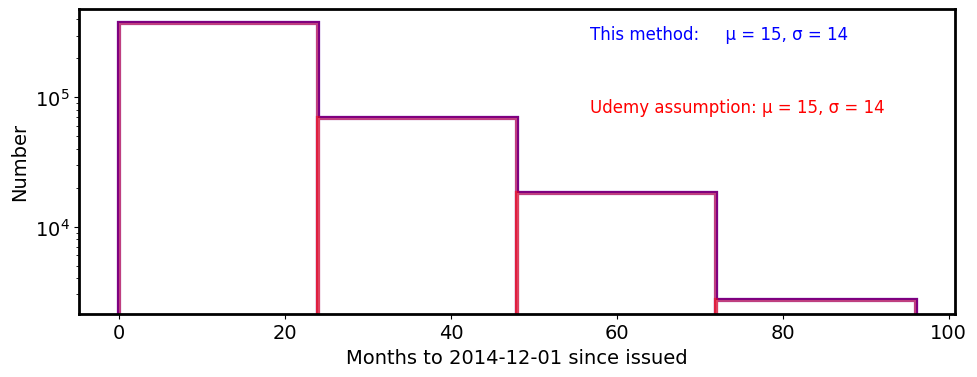

count                  466256
unique                     91
top       2014-10-01 00:00:00
freq                    38782
first     2007-06-01 00:00:00
last      2014-12-01 00:00:00
Name: issued, dtype: object


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:78: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[para].describe())


In [8]:
## ISSUE DATE
date_fix('issue_d','issued','temp_d','issued_m','2014-12-01')

0         Jan-15
1         Apr-13
2         Jun-14
3         Jan-15
4         Jan-16
           ...  
466280    Jan-16
466281    Dec-14
466282    Jan-16
466283    Dec-14
466284    Jan-16
Name: last_pymnt_d, Length: 466256, dtype: object
0        2015-01-01
1        2013-04-01
2        2014-06-01
3        2015-01-01
4        2016-01-01
            ...    
466280   2016-01-01
466281   2014-12-01
466282   2016-01-01
466283   2014-12-01
466284   2016-01-01
Name: date, Length: 466256, dtype: datetime64[ns]
count                  465880
unique                     98
top       2016-01-01 00:00:00
freq                   179620
first     2007-12-01 00:00:00
last      2016-01-01 00:00:00
Name: date, dtype: object
2023-05-05


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[para] = pd.to_datetime(df[orig], format = '%b-%y')
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[para]); print(df[para].describe())
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be rem

count                  465880
unique                     98
top       2016-01-01 00:00:00
freq                   179620
first     2007-12-01 00:00:00
last      2016-01-01 00:00:00
Name: date, dtype: object
count    465880.000000
mean          8.301222
std          12.801416
min           0.000000
25%           0.000000
50%           1.018501
75%          11.992033
max          97.020473
Name: MNTHS, dtype: float64
count    465880.000000
mean          8.301222
std          12.801416
min           0.000000
25%           0.000000
50%           1.018501
75%          11.992033
max          97.020473
Name: Other_MNTHS, dtype: float64


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tmp'] = df[para].astype(str);  ## MY METHOD
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['tmp'].str.split('-').str[0];
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

count    465880.000000
mean          8.301222
std          12.801416
min           0.000000
25%           0.000000
50%           1.018501
75%          11.992033
max          97.020473
Name: LP_m, dtype: float64


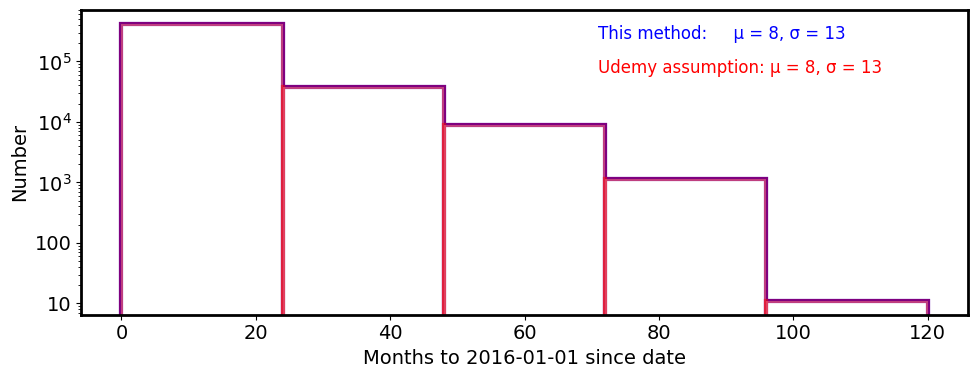

count                  465880
unique                     98
top       2016-01-01 00:00:00
freq                   179620
first     2007-12-01 00:00:00
last      2016-01-01 00:00:00
Name: date, dtype: object
0         Jan-16
1         Sep-13
2         Jan-16
3         Jan-15
4         Jan-16
           ...  
466280    Jan-16
466281    Jan-16
466282    Dec-15
466283    Apr-15
466284    Jan-16
Name: last_credit_pull_d, Length: 465880, dtype: object
0        2016-01-01
1        2013-09-01
2        2016-01-01
3        2015-01-01
4        2016-01-01
            ...    
466280   2016-01-01
466281   2016-01-01
466282   2015-12-01
466283   2015-04-01
466284   2016-01-01
Name: date, Length: 465880, dtype: datetime64[ns]
count                  465839
unique                    103
top       2016-01-01 00:00:00
freq                   327599
first     2007-05-01 00:00:00
last      2016-01-01 00:00:00
Name: date, dtype: object
2023-05-05


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:78: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[para].describe())
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[para]); print(df[para].describe())
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=Tru

count                  465839
unique                    103
top       2016-01-01 00:00:00
freq                   327599
first     2007-05-01 00:00:00
last      2016-01-01 00:00:00
Name: date, dtype: object
count    465839.000000
mean          4.033558
std           9.599597
min           0.000000
25%           0.000000
50%           0.000000
75%           2.004148
max         104.051418
Name: MNTHS, dtype: float64
count    465839.000000
mean          4.033558
std           9.599597
min           0.000000
25%           0.000000
50%           0.000000
75%           2.004148
max         104.051418
Name: Other_MNTHS, dtype: float64
count    465839.000000
mean          4.033558
std           9.599597
min           0.000000
25%           0.000000
50%           0.000000
75%           2.004148
max         104.051418
Name: LCP_m, dtype: float64


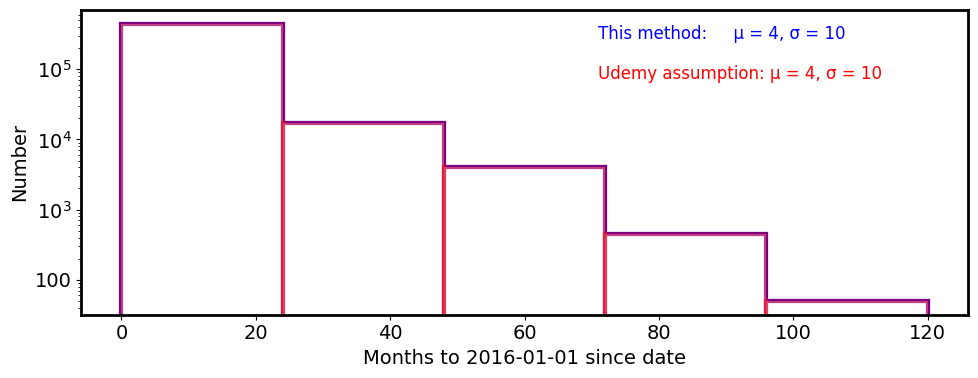

count                  465839
unique                    103
top       2016-01-01 00:00:00
freq                   327599
first     2007-05-01 00:00:00
last      2016-01-01 00:00:00
Name: date, dtype: object


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/834546472.py:78: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[para].describe())


In [168]:
## LAST PAYMENT DATE
date_fix('last_pymnt_d', 'date','temp_d','LP_m','2016-01-01')
## LAST CREDIT PULL DATE
date_fix('last_credit_pull_d', 'date','temp_d','LCP_m','2016-01-01')

In [197]:
## MORE TIDYING
print(df)
del df['ECL']; del df['issued'];  # NO LONGER NEED
del df['DYS']; del df['MNTHS']; del df['tmp']; del df['temp_d']; del df['date']
del df['Other_MNTHS']; del df['year']; del df['month']; del df['day']
del df['url']
print(df['acc_now_delinq'].unique())
del df['application_type']; del df['zip_code']; del df['sub_grade']

        Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv  term  int_rate  installment grade  ...        ECL  \
0                4975.0    36     10.65       162.87     B  ... 1985-01-01   
1                2500.0    60     15.27        59.8

KeyError: 'issued'

In [198]:
## LOSE THOSE WITH > 30000 MISSING VALUES
max_missing(df,30000)

tot_coll_amt has 70247 missing values
tot_cur_bal has 70247 missing values
total_rev_hi_lim has 70247 missing values


In [199]:
## UNIQUE VALUES OF REMAINING FEATURES TO SEE IF CAN REMOVE
def uniques(para):
    print(df[para].unique())
    print("%s has %d unique values" %(para, len(df[para].unique())))
#uniques('emp_title');
#del df['emp_title']
#uniques('title');
#del df['title']
#uniques('revol_util') # NUMERICAL, SO IMPUTE?
#uniques('collections_12_mths_ex_med')
#uniques('EM_L')
#print(df['EM_L'])

In [200]:
## IMPUTE REMAINING MISSING VALUES
df_orig = df.copy()
cols = ['revol_util','collections_12_mths_ex_med','EM_L']
print("------------ BEFORE IMPUTATION -------------- ")
for (i,col) in enumerate(cols):
    print("For %s, n = %d, mean = %1.3f +/- %1.3f" %(col,df[col].count(), np.mean(df[col]),np.std(df[col])))


------------ BEFORE IMPUTATION -------------- 
For revol_util, n = 465945, mean = 56.177 +/- 23.733
For collections_12_mths_ex_med, n = 466140, mean = 0.009 +/- 0.109
For EM_L, n = 445248, mean = 5.994 +/- 3.627


In [201]:
df_num = df.select_dtypes(include=np.number) 
df_rest=df[['id','grade','home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status']]

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer      
imp = IterativeImputer(max_iter=1000, random_state=0)

#print(df_num)
#!pip3 list
#!pip3 install --upgrade scikit-learn


In [202]:
#imp_array = imp.fit_transform(df_num) 
#df_imp = pd.DataFrame(imp_array) 
#df_imp.columns = df_num.columns
# MULTI-IMPUTATION KEEPS CRASHING. JUST REMOVE ENTRIES WUTH MISSING VALUES
# WILL BE INTERESTING TO COMPARE WITH IMPUTED VERSION ANYWAY
max_missing(df,0)

emp_title has 27576 missing values
title has 20 missing values
revol_util has 311 missing values
last_pymnt_d has 376 missing values
last_credit_pull_d has 41 missing values
collections_12_mths_ex_med has 116 missing values
EM_L has 21008 missing values


In [204]:
## FORMIATTING TARGET INTO A BINARY VALUE
df['debt'] = df['loan_amnt'] - df['total_rec_prncp']; print(df['debt'])
df['DTIR'] = df['debt']/df['annual_inc'] 

arr1 = []; good = []; bad = []
cols = df['loan_status'].unique();# print(cols)
for (i,col) in enumerate(cols):
    temp = df[df['loan_status'] ==col]
    mean = np.mean(temp['DTIR']); sd = np.std(temp['DTIR']); n = temp['DTIR'].count()
    arr1.append(col)
    arr1.append(n)
    arr1.append(round(mean,4))
    arr1.append(round(sd/(n**0.5),4))
    if mean < 0.15:  # FOR MAPPING VALUES
        good.append(col)
    else:
        bad.append(col)
    
arr2 = np.reshape(arr1,(-1,4)); #print(arr2)
df1 = pd.DataFrame(arr2, columns=['loan_status','number','mean DTIR','standard error'])
print(df1.sort_values(by=['mean DTIR']))

df['good'] = df['loan_status'].map({good[i]:1 for i in range(0,len(good))})
df['good']= df['good'].fillna(0)
df['good'] = df['good'].astype(int)

print(df[['loan_status','good']])
good = df[df['good']==1]; print("Giving %d good loans (good = 1)" %(len(good)))
bad = df[df['good']==0]; print(" and %d bad loans (good = 0)" %(len(bad)))    


/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/3458203077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['debt'] = df['loan_amnt'] - df['total_rec_prncp']; print(df['debt'])
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/3458203077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DTIR'] = df['debt']/df['annual_inc']


0             0.00
1          2043.54
2             0.00
3             0.00
4           766.90
            ...   
466280    12574.00
466281    20162.96
466282    14428.31
466283        0.00
466284     3984.38
Name: debt, Length: 466256, dtype: float64
                                         loan_status  number mean DTIR  \
0                                         Fully Paid  184739    0.0008   
7  Does not meet the credit policy. Status:Fully ...    1962    0.0027   
8  Does not meet the credit policy. Status:Charge...     758    0.1192   
2                                            Current  224226    0.1283   
5                                    In Grace Period    3146    0.1399   
6                                  Late (16-30 days)    1218    0.1411   
4                                 Late (31-120 days)    6900    0.1587   
3                                            Default     832    0.1743   
1                                        Charged Off   42475    0.1835   

  stand

/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/3458203077.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['good'] = df['loan_status'].map({good[i]:1 for i in range(0,len(good))})
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/3458203077.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['good']= df['good'].fillna(0)
/var/folders/pb/dhr60dvd19370mv4qdxrn34m0000gn/T/ipykernel_92443/3458203077.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy

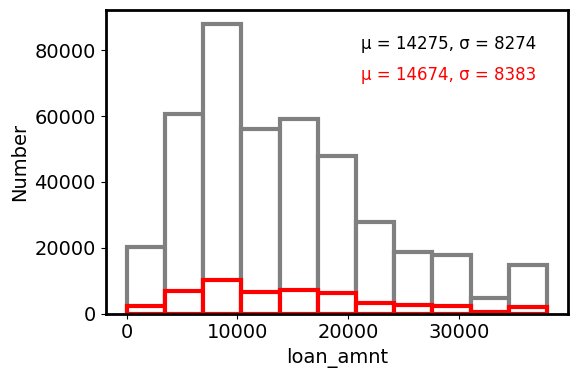

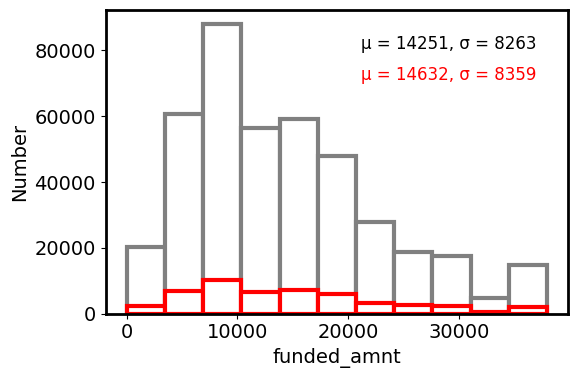

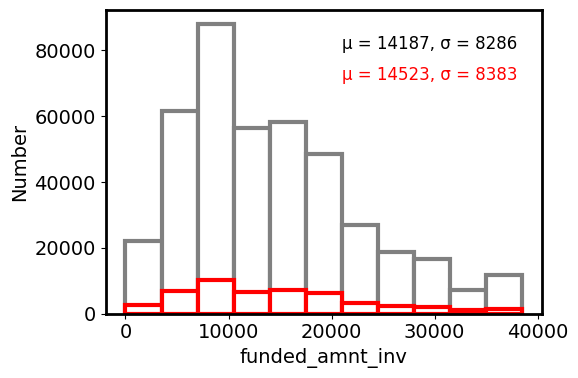

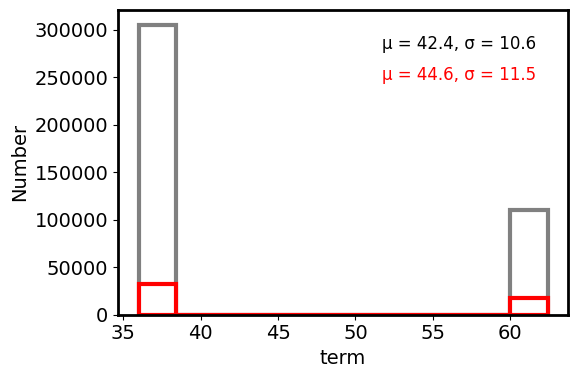

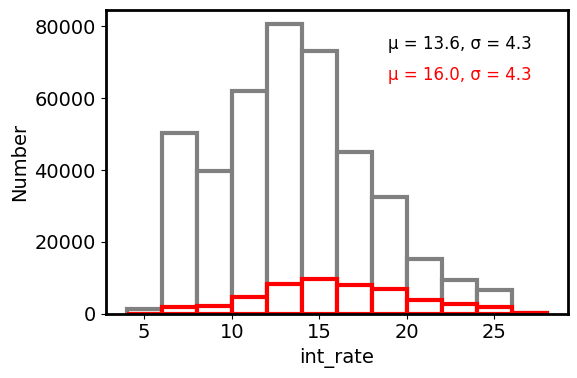

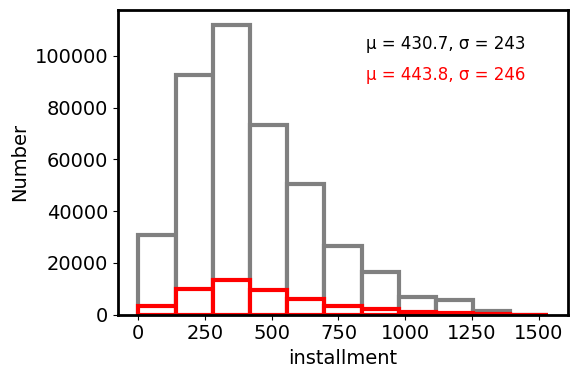

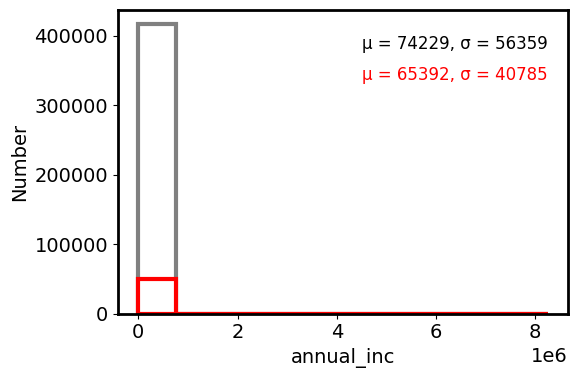

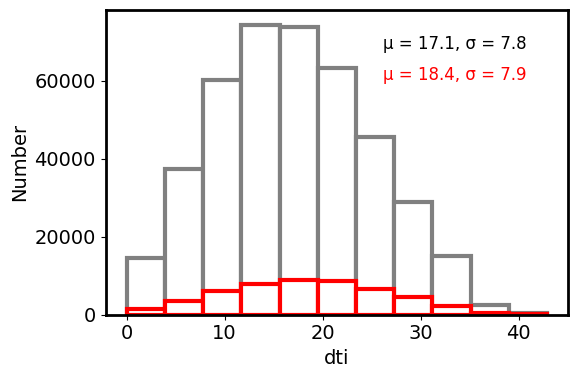

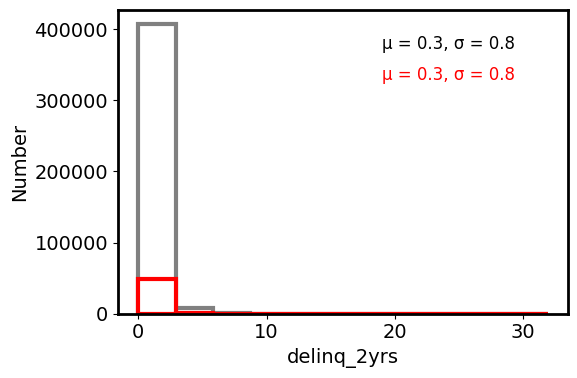

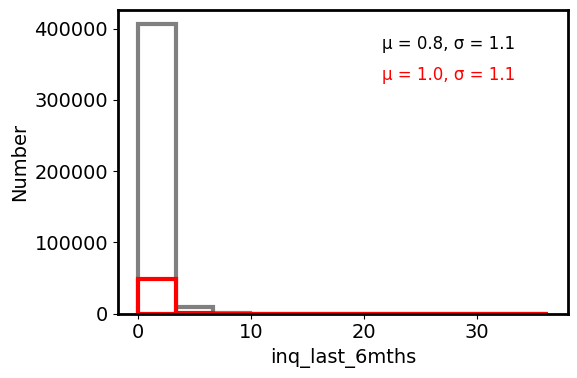

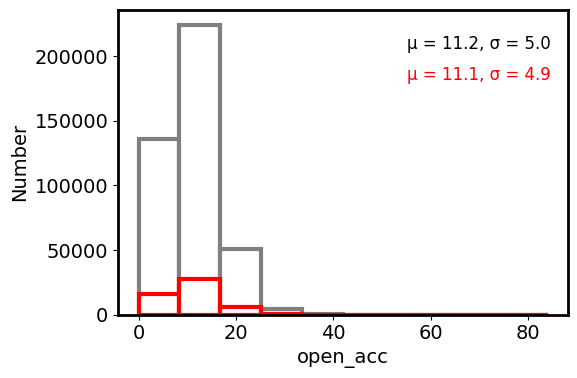

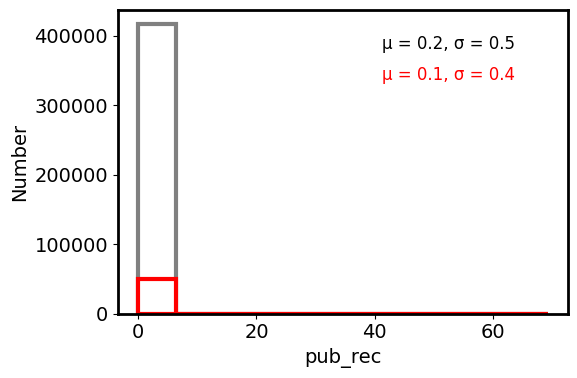

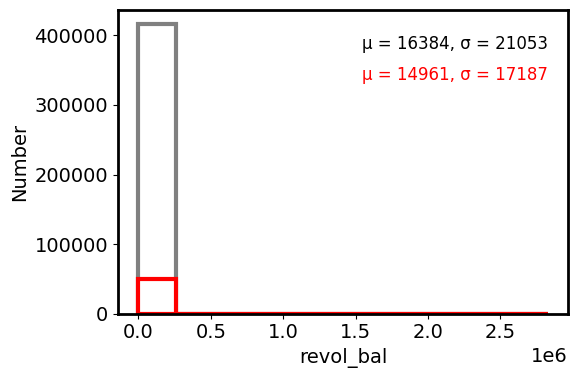

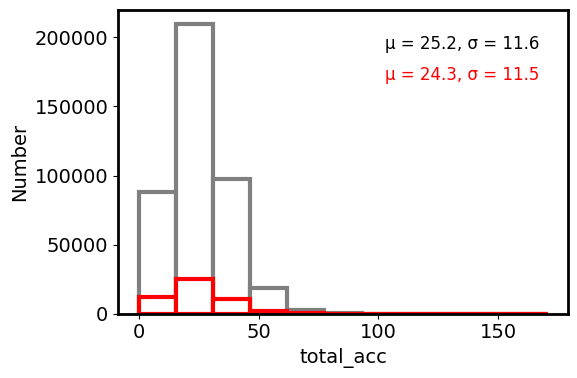

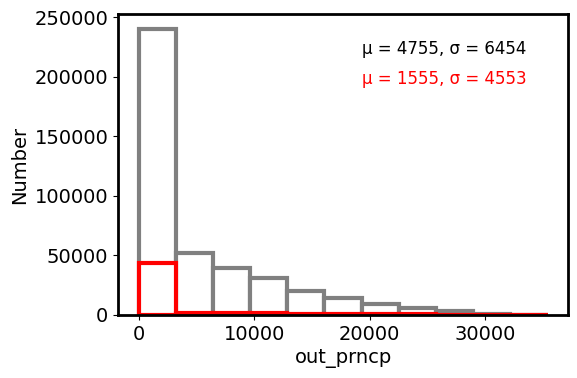

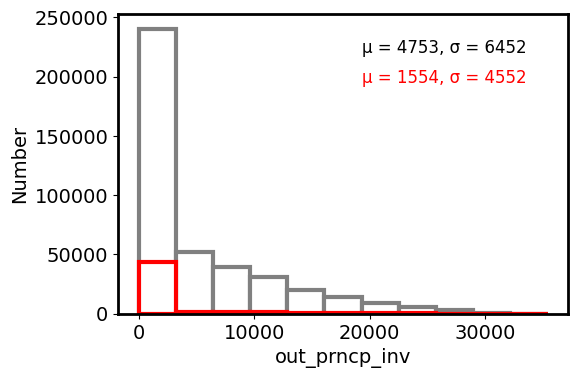

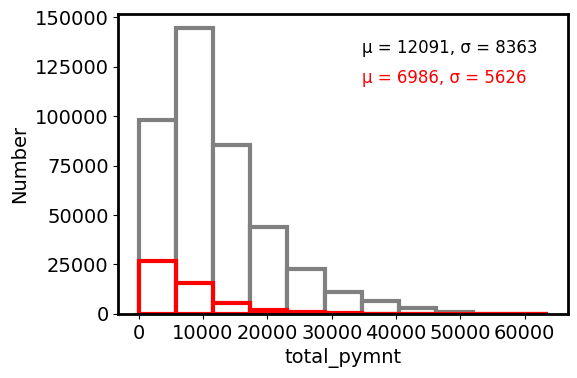

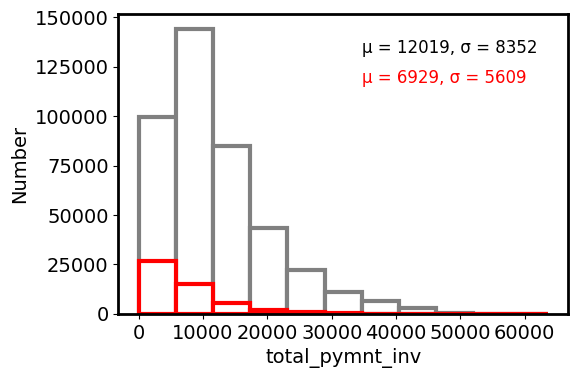

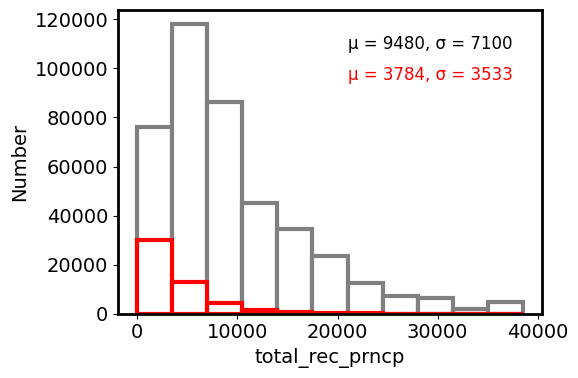

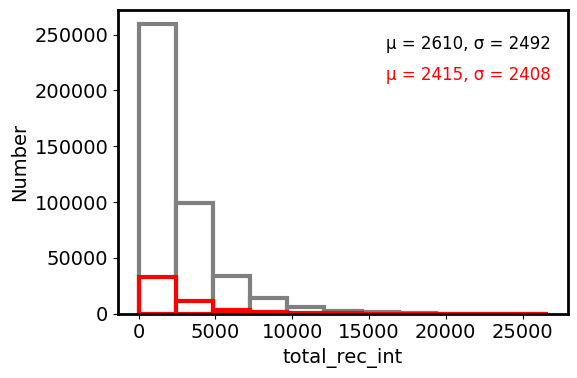

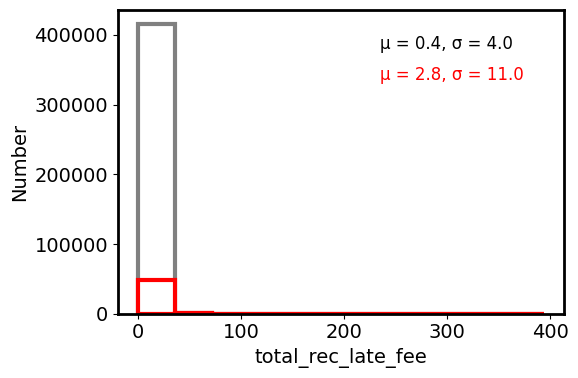

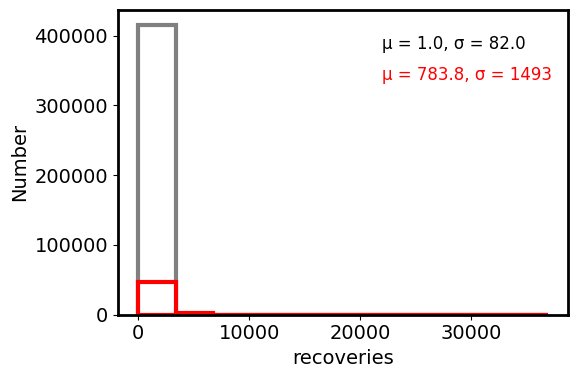

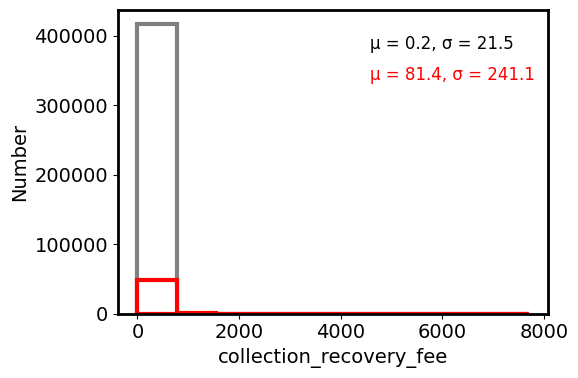

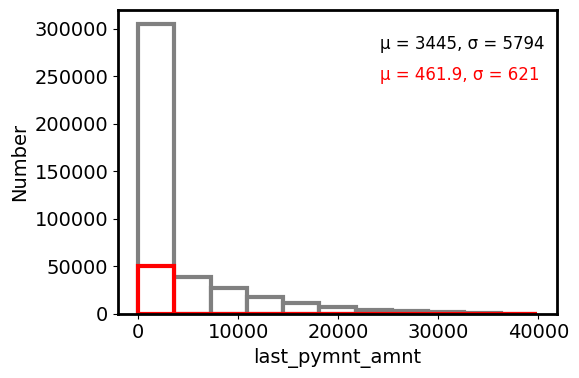

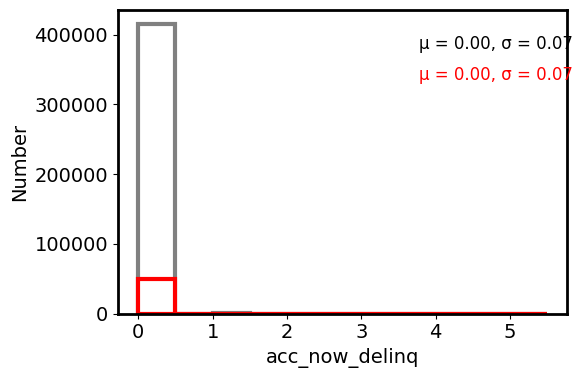

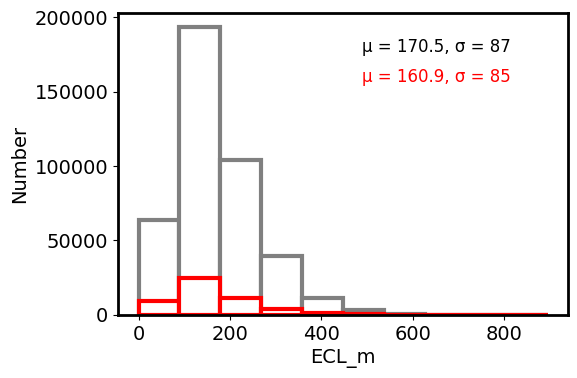

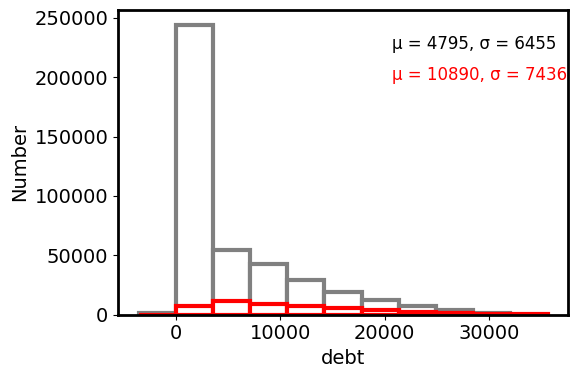

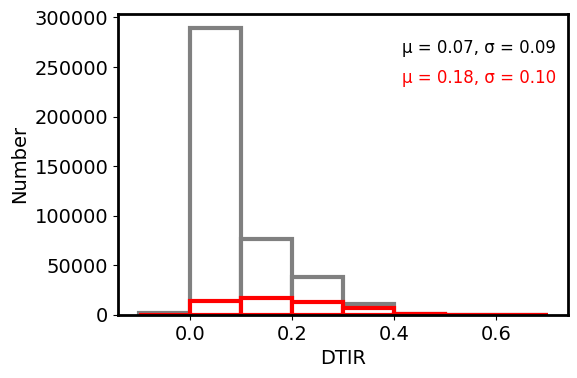

In [205]:
## HISTOGRAMS SPLIT BY LOAN CLASS
df_num = df.select_dtypes(include=np.number); #print(df)
paras = df_num.columns; #print(paras)
# 'policy_code' # CAUSED A CRASH

paras = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt','acc_now_delinq','ECL_m', 
        'debt','DTIR']

for (i, para) in enumerate(paras):
 
    fact = 10

    xmin = min(df[para]); xmax = max(df[para]);
    
    if para == "DTIR":
        desired_bin_size = 0.1
    else:
        desired_bin_size = int(xmax - xmin)/fact
          
    data = df[para]; #print(data)
    min_val = np.min(data); max_val = np.max(data); #print(min_val,max_val)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    
    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(6,4))
    ax = plt.gca()
    plt.setp(ax.spines.values(),linewidth=2)
    
    text = '%s' %(para)
    plt.ylabel('Number', size=14); plt.xlabel(text, size=14)
    good = df.loc[df['good'] == 1]
    bad = df.loc[df['good'] == 0]; #print(len(sus),len(non))
    
    ax.hist(good[para], bins=bins, color="w", edgecolor='grey', linewidth=3);
    mean = np.mean(good[para]); std = np.std(good[para])
    ymin, ymax = plt.ylim();

    if xmax <= 1:
        text = "\u03BC = %1.2f, \u03C3 = %1.2f" %(mean,std); xoff = 2.5    
    elif xmax >1 and xmax <= 10:
        text = "\u03BC = %1.2f, \u03C3 = %1.2f" %(mean,std); xoff = 4.1
    elif xmax >10 and mean <= 100:
        text = "\u03BC = %1.1f, \u03C3 = %1.1f" %(mean,std); xoff = 2.9
    elif xmax >100 and mean <= 1000:
        text = "\u03BC = %1.1f, \u03C3 = %1.0f" %(mean,std);xoff = 2.5  
    elif xmax > 1000 and mean <= 4000: # 10000:
        text = "\u03BC = %1.0f, \u03C3 = %1.0f" %(mean,std); xoff = 3.0
    else:
        text = "\u03BC = %1.0f, \u03C3 = %1.0f" %(mean,std); xoff = 2.5

    x_pos = xmax-((xmax-xmin)/xoff); y_pos = ymax-((ymax-ymin)/12); y_skip =  ymax-((ymax-ymin)/2);  
    plt.text(x_pos,y_pos, text, fontsize = 12, c = 'k', horizontalalignment='left',verticalalignment='top')

    
    ax.hist(bad[para], bins=bins, color="w", edgecolor='r', linewidth=3);
    mean = np.mean(bad[para]); std = np.std(bad[para])

    if xmax < 10:
        text = "\u03BC = %1.2f, \u03C3 = %1.2f" %(mean,std); xoff = 4.1
    elif xmax >10 and mean <= 100:
        text = "\u03BC = %1.1f, \u03C3 = %1.1f" %(mean,std); xoff = 2.9
    elif xmax >100 and mean <= 1000:
        text = "\u03BC = %1.1f, \u03C3 = %1.0f" %(mean,std);xoff = 2.5  
    elif xmax > 1000 and mean <= 10000:
        text = "\u03BC = %1.0f, \u03C3 = %1.0f" %(mean,std); xoff = 3.0
    else:
        text = "\u03BC = %1.0f, \u03C3 = %1.0f" %(mean,std); xoff = 2.5
    
    plt.text(x_pos,y_pos-0.2*y_skip, text, fontsize = 12, c = 'r', horizontalalignment='left',verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

In [206]:
## pre-process_2.py
del df['id']; del df['loan_status']

In [207]:
## FUNCTIONS
def woe(data, para ,kind):  # WEIGHT OF EVIDENCE
    data = pd.DataFrame(columns=['n_obs'])
    data['n_obs'] = df.groupby([para]).count()['good'];
    data[para] = data.index
    data = data[[para,'n_obs']]
    data['%n_obs'] = round(100*data['n_obs'] / data['n_obs'].sum(),2)
    data['n_good'] = df.groupby([para]).sum(numeric_only=True)['good']; 
    data['n_bad'] = data['n_obs']-data['n_good']

    data['%good'] = round(100*data['n_good']/data['n_obs'],2)
    data['%bad'] = round(100*data['n_bad'] / data['n_obs'],2)
    data['%n_good'] = round(100*data['n_good'] / data['n_good'].sum(),2)
    data['%n_bad'] = round(100*data['n_bad'] / data['n_bad'].sum(),2)
    data['WoE'] = np.log(data['%n_good'] / data['%n_bad'])

    #data = data[[para,'n_obs','%_good','%_n_obs','n_good']]
    data['WoE'] = round(np.log(data['%n_good'] / data['%n_bad']),2)
    #data['WoE_x_n'] = abs(data['WoE']*data['n_obs'])
    
    if kind == 'discrete':  # OPTION FOR discrete OR continuous data
         data = data.sort_values(['WoE'])

    #data = data[data['%n_good'] >0]; data = data[data['%n_bad'] >0] # UMCOMMENT TO GET IVs
    data['IV'] = (data['%n_good']/100 - data['%n_bad']/100) * data['WoE']
    temp1 =  data[data['%n_good'] >0]; temp2 = temp1[temp1['%n_bad'] >0] 
    IV_sum = temp2['IV'].sum()
    
    data = data.reset_index(drop=True)

    if IV_sum < 0.02:
        text = "IV < 0.02 - no predictive power"
    elif IV_sum >= 0.02 and IV_sum < 0.1:
        text = "0.02 < IV < 0.1 - weak predictive power"
    elif IV_sum >= 0.1 and IV_sum < 0.3:
        text = "0.1 < IV < 0.3 - medium predictive power"
    elif IV_sum >= 0.3 and IV_sum <= 0.5:   
        text = "0.3 < IV < 0.5 - strong predictive power"
    else:
        text = "IV >  0.5 - something fishy going on"
     
    print(data)
    print("==============================================================================================")
    print("For '%s' feature, sum of IVs = %1.4f: %s" %(para,IV_sum,text))   
    print("==============================================================================================\n\n")
    
    return data #,para,IV_sum #,text

    
def woe_plot(size,rot,para):
    plt.rcParams.update({'font.size': size})
    plt.figure(figsize = (8, 4))
    ax = plt.gca();

    name = df_WoE.columns[0]
    x = np.array(df_WoE.iloc[: , 0].apply(str)) 
    y = df_WoE[para] 
    plt.setp(ax.spines.values(), linewidth=2)
    ax.scatter(x,y, c='k', marker='o',  s=40)
    ax.plot(x,y,c='r',linewidth=3)
    ax.set_xlabel(name); ax.set_ylabel(para)
    plt.xticks(rotation = rot)

    plt.tight_layout() #
    plt.show()

def comb_dummy(para,text):
    arr = []
    new = '%s_%s+' %(para,text[0])

    for i in range (0 ,len(text)):
        col = '%s_%s' %(para,str(text[i]))
        arr.append(col)

    df[new]= df[arr].sum(axis =1)  

    for i in range(0,len(arr)):  # CLEANING UP
        del df[arr[i]]    

print("==================================== GRADE =====================================")
#print(df['grade'].unique())
woe(df,'grade','discrete')
df= pd.get_dummies(df,columns= ['grade']);

==================================== GRADE =====================================
  grade   n_obs  %n_obs  n_good  n_bad  %good   %bad  %n_good  %n_bad   WoE  \
0     G    3322    0.71    2470    852  74.35  25.65     0.59    1.70 -1.06   
1     F   13229    2.84   10130   3099  76.57  23.43     2.43    6.17 -0.93   
2     E   35756    7.67   28950   6806  80.97  19.03     6.96   13.56 -0.67   
3     D   76887   16.49   65236  11651  84.85  15.15    15.68   23.21 -0.39   
4     C  125287   26.87  111051  14236  88.64  11.36    26.69   28.35 -0.06   
5     B  136919   29.37  126245  10674  92.20   7.80    30.34   21.26  0.36   
6     A   74856   16.05   71967   2889  96.14   3.86    17.30    5.75  1.10   

         IV  
0  0.011766  
1  0.034782  
2  0.044220  
3  0.029367  
4  0.000996  
5  0.032688  
6  0.127050  
For 'grade' feature, sum of IVs = 0.2809: 0.1 < IV < 0.3 - medium predictive power




==================================== HOME OWNERSHIP =====================================
  home_ownership   n_obs  %n_obs  n_good  n_bad   %good   %bad  %n_good  \
0          OTHER     182    0.04     155     27   85.16  14.84     0.04   
1           RENT  188208   40.40  165019  23189   87.68  12.32    39.67   
2           NONE      46    0.01      39      7   84.78  15.22     0.01   
3            OWN   41654    8.94   37231   4423   89.38  10.62     8.95   
4       MORTGAGE  235748   50.61  213557  22191   90.59   9.41    51.34   
5            ANY       1    0.00       1      0  100.00   0.00     0.00   

   %n_bad   WoE        IV  
0    0.05 -0.22  0.000022  
1   46.53 -0.16  0.010976  
2    0.01  0.00  0.000000  
3    8.87  0.01  0.000008  
4   44.53  0.14  0.009534  
5    0.00   NaN       NaN  
For 'home_ownership' feature, sum of IVs = 0.0205: 0.02 < IV < 0.1 - weak predictive power




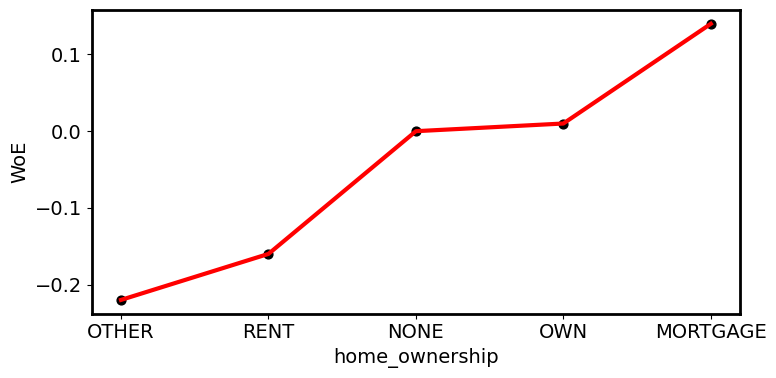

In [179]:
print("==================================== HOME OWNERSHIP =====================================")
df_WoE = woe(df,'home_ownership','discrete')
woe_plot(14,0,'WoE')

In [180]:
df.rename(columns={'home_ownership':'HO'}, inplace=True);
df = pd.get_dummies(df, columns= ['HO'])
comb_dummy('HO',['RENT', 'OTHER']);  # FEATURE, MAIN COLUMN, OTHER COLS TO MERGE
comb_dummy('HO',['OWN','NONE','ANY'])
print(df)

        loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0            5000         5000           4975.0    36     10.65       162.87   
1            2500         2500           2500.0    60     15.27        59.83   
2            2400         2400           2400.0    36     15.96        84.33   
3           10000        10000          10000.0    36     13.49       339.31   
4            3000         3000           3000.0    60     12.69        67.79   
...           ...          ...              ...   ...       ...          ...   
466280      18400        18400          18400.0    60     14.47       432.64   
466281      22000        22000          22000.0    60     19.97       582.50   
466282      20700        20700          20700.0    60     16.99       514.34   
466283       2000         2000           2000.0    36      7.90        62.59   
466284      10000        10000           9975.0    36     19.20       367.58   

       sub_grade  annual_inc verificati

In [208]:
print("==================================== VERIFICATION STATUS =====================================")
df.rename(columns={'verification_status':'VS'}, inplace=True);
df_WoE = woe(df,'VS','discrete')
df = pd.get_dummies(df, columns= ['VS']);

==================================== VERIFICATION STATUS =====================================
                VS   n_obs  %n_obs  n_good  n_bad  %good   %bad  %n_good  \
0         Verified  168055   36.04  146818  21237  87.36  12.64    35.29   
1  Source Verified  149993   32.17  134458  15535  89.64  10.36    32.32   
2     Not Verified  148208   31.79  134773  13435  90.94   9.06    32.39   

   %n_bad   WoE        IV  
0   42.30 -0.18  0.012618  
1   30.94  0.04  0.000552  
2   26.76  0.19  0.010697  
For 'VS' feature, sum of IVs = 0.0239: 0.02 < IV < 0.1 - weak predictive power




In [182]:
print("==================================== PAYMENT PLAN =====================================")
df.rename(columns={'pymnt_plan':'PP'}, inplace=True);
df_WoE = woe(df,'PP','discrete')
del df['PP']

==================================== PAYMENT PLAN =====================================
  PP   n_obs  %n_obs  n_good  n_bad  %good   %bad  %n_good  %n_bad  WoE   IV
0  y       9     0.0       5      4  55.56  44.44      0.0    0.01 -inf  inf
1  n  465830   100.0  415997  49833  89.30  10.70    100.0   99.99  0.0  0.0
For 'PP' feature, sum of IVs = 0.0000: IV < 0.02 - no predictive power




/Users/stephencurran/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/stephencurran/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


==================================== PURPOSE =====================================
                     P   n_obs  %n_obs  n_good  n_bad  %good   %bad  %n_good  \
0       small_business    7013    1.50    5572   1441  79.45  20.55     1.34   
1     renewable_energy     351    0.08     298     53  84.90  15.10     0.07   
2               moving    2994    0.64    2552    442  85.24  14.76     0.61   
3                house    2269    0.49    1962    307  86.47  13.53     0.47   
4                other   23662    5.07   20514   3148  86.70  13.30     4.93   
5              medical    4602    0.99    4008    594  87.09  12.91     0.96   
6          educational     422    0.09     366     56  86.73  13.27     0.09   
7              wedding    2343    0.50    2071    272  88.39  11.61     0.50   
8             vacation    2487    0.53    2200    287  88.46  11.54     0.53   
9   debt_consolidation  274194   58.81  243417  30777  88.78  11.22    58.51   
10    home_improvement   26537    5.6

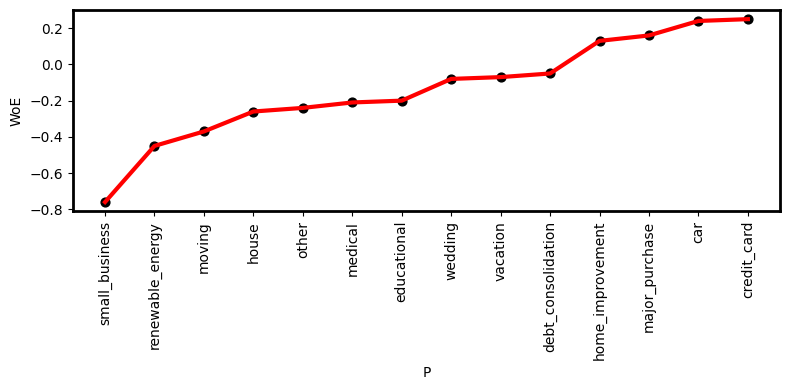

In [209]:
print("==================================== PURPOSE =====================================")
df.rename(columns={'purpose':'P'}, inplace=True);
df_WoE = woe(df,'P','discrete')
woe_plot(10,90,'WoE')
df = pd.get_dummies(df, columns= ['P'])
comb_dummy('P',['small_business', 'moving','renewable_energy'])
comb_dummy('P',['other','house','educational','medical'])
comb_dummy('P',['debt_consolidation','vacation','wedding'])
comb_dummy('P',['home_improvement','major_purchase'])
comb_dummy('P',['credit_card','car']);

==================================== ADDRESS STATE =====================================
    AS  n_obs  %n_obs  n_good  n_bad   %good   %bad  %n_good  %n_bad   WoE  \
0   NE     14    0.00       9      5   64.29  35.71     0.00    0.01  -inf   
1   NV   6519    1.40    5641    878   86.53  13.47     1.36    1.75 -0.25   
2   HI   2487    0.53    2175    312   87.45  12.55     0.52    0.62 -0.18   
3   FL  31635    6.78   27741   3894   87.69  12.31     6.67    7.76 -0.15   
4   AL   5853    1.26    5138    715   87.78  12.22     1.23    1.42 -0.14   
5   NY  40233    8.63   35589   4644   88.46  11.54     8.55    9.25 -0.08   
6   LA   5488    1.18    4853    635   88.43  11.57     1.17    1.26 -0.07   
7   NM   2588    0.56    2292    296   88.56  11.44     0.55    0.59 -0.07   
8   OK   4117    0.88    3645    472   88.54  11.46     0.88    0.94 -0.07   
9   NC  12682    2.72   11234   1448   88.58  11.42     2.70    2.88 -0.06   
10  CA  71450   15.32   63434   8016   88.78  11.22  

/Users/stephencurran/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/stephencurran/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


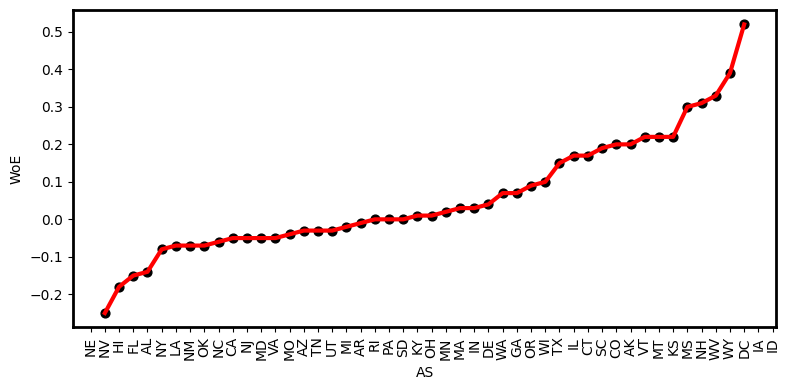

['NE', 'NV', 'HI', 'FL', 'AL', 'NY', 'LA', 'NM', 'OK', 'NC', 'CA', 'NJ', 'MD', 'VA', 'MO', 'AZ', 'TN', 'UT', 'MI', 'AR', 'RI', 'PA', 'SD', 'KY', 'OH', 'MN', 'MA', 'IN', 'DE', 'WA', 'GA', 'OR', 'WI', 'TX', 'IL', 'CT', 'SC', 'CO', 'AK', 'VT', 'MT', 'KS', 'MS', 'NH', 'WV', 'WY', 'DC', 'IA', 'ID', 'ME']
Index(['Unnamed: 0', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'issue_d', 'pymnt_plan', 'url',
       'zip_code', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'DYS', 'MNTHS', 'Other_MNTHS',
       'tmp', 'year', 'month', 'day', 'temp_d', 'ECL_m', 'de

In [210]:
print("==================================== ADDRESS STATE =====================================")
df.rename(columns={'addr_state':'AS'}, inplace=True);
df_WoE = woe(df,'AS','discrete')
woe_plot(10,90,'WoE')

print(df_WoE.AS.values.tolist())
df = pd.get_dummies(df, columns= ['AS'])
comb_dummy('AS',['FL', 'NV', 'HI', 'NE','AL'])
comb_dummy('AS',['LA', 'OK', 'NM'])
comb_dummy('AS',['MO', 'UT', 'TN'])
comb_dummy('AS',['AZ', 'AR', 'SD', 'RI'])
comb_dummy('AS',['KY', 'MN', 'IN', 'MA', 'DE'])
comb_dummy('AS',['GA', 'OR', 'WI'])
comb_dummy('AS',['CT', 'IL'])
comb_dummy('AS',['SC', 'CO', 'AK', 'MT', 'KS'])
comb_dummy('AS',['NH', 'VT', 'MS', 'WV'])
comb_dummy('AS',['WY', 'DC', 'IA', 'ID', 'ME']); #print(df)
## CHECK
print(df.columns)
cols = ['AS_CA', 'AS_MD', 'AS_MI', 'AS_NC','AS_NJ', 'AS_NY', 'AS_OH', 'AS_PA', 'AS_TX', 'AS_VA', 'AS_WA', 'AS_FL+', 'AS_LA+', 'AS_MO+', 'AS_KY+','AS_GA+', 'AS_CT+', 'AS_SC+', 'AS_NH+', 'AS_WY+']
df_AS = df[cols]
for (i,col) in enumerate(cols):
    print(col, df_AS[col].sum())

In [211]:
print("==================================== INITIAL LIST STATUS  =====================================")
df.rename(columns={'initial_list_status':'ILS'}, inplace=True);
df_WoE = woe(df,'ILS','discrete')
df = pd.get_dummies(df, columns= ['ILS'])
print(df)   

==================================== INITIAL LIST STATUS  =====================================
  ILS   n_obs  %n_obs  n_good  n_bad  %good   %bad  %n_good  %n_bad   WoE  \
0   f  302976   64.98  267283  35693  88.22  11.78    64.24   71.09 -0.10   
1   w  163280   35.02  148766  14514  91.11   8.89    35.76   28.91  0.21   

         IV  
0  0.006850  
1  0.014385  
For 'ILS' feature, sum of IVs = 0.0212: 0.02 < IV < 0.1 - weak predictive power


        Unnamed: 0  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0                0    1296599       5000         5000           4975.0    36   
1                1    1314167       2500         2500           2500.0    60   
2                2    1313524       2400         2400           2400.0    36   
3                3    1277178      10000        10000          10000.0    36   
4                4    1311748       3000         3000           3000.0    60   
...            ...        ...        ...          ...              .